#Preparation stage

#Preparation stage
###Importing libraries and dataset


In [ ]:
#import necssary libraries
#Pandas for working with series or matrix data with row and column labels
import pandas as pd
#sklearn libraries
from sklearn.preprocessing import MinMaxScaler #for scaling
from sklearn.metrics import pairwise_distances #for calculating distances between value points
#for plotting, visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataframe from teh google drive
#converting the "song_name" column into an indexes one, so we don't have to drop it as a categorical column(more explanation in the next cells)
url = 'https://drive.google.com/file/d/1nB2zDk6etb7ydlfYSt-0JZ-WzJeENo3Q/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, index_col = "song_name")
df

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,,,,,,,,,,,,,,,,
My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


#Preparing the data for clustering


In [ ]:
#creating a copy of the dataframe for convinience
songs_df = df.copy()
songs_df

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,,,,,,,,,,,,,,,,
My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [ ]:
#dropinng categorical columns as they cannot be calculated(alternatively we could transform them into the index column)
songs_df.drop(["artist", "id", "html"], axis=1, inplace=True)
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
The Real Slim Shady,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Águas De Março,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
The Girl From Ipanema,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
"Paint It, Black",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Sultans Of Swing,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
In Silence,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


In [ ]:
songs_df.index

Index(['My Band', 'The Real Slim Shady', 'Águas De Março',
       'The Girl From Ipanema', 'Paint It, Black', 'Sultans Of Swing',
       'Space Raiders - Charlotte de Witte Remix', 'In Silence',
       'Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]',
       'Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1'],
      dtype='object', name='song_name')

In [ ]:
#checking for outliers
songs_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.633600,0.520743,3.400000,-14.029300,0.800000,0.067630,0.434652,0.331780,0.153840,0.456580,118.716000,287493.800000,3.900000
std,0.229072,0.348562,2.221111,9.217901,0.421637,0.036715,0.447731,0.428544,0.114019,0.321551,33.661904,96496.252263,0.316228
min,0.184000,0.008330,1.000000,-33.503000,0.000000,0.030700,0.003140,0.000000,0.045400,0.059800,61.494000,109800.000000,3.000000
25%,0.508250,0.189750,1.500000,-16.468250,1.000000,0.038025,0.034975,0.000417,0.105000,0.201250,108.381500,226406.750000,4.000000
50%,0.687500,0.696000,3.000000,-11.441000,1.000000,0.054550,0.279200,0.019570,0.111000,0.439500,128.663500,291486.500000,4.000000
75%,0.745750,0.794750,4.750000,-9.456000,1.000000,0.090150,0.863750,0.799250,0.115000,0.723000,140.562750,340964.750000,4.000000
max,0.949000,0.849000,8.000000,-3.383000,1.000000,0.140000,0.990000,0.913000,0.399000,0.931000,158.691000,438720.000000,4.000000


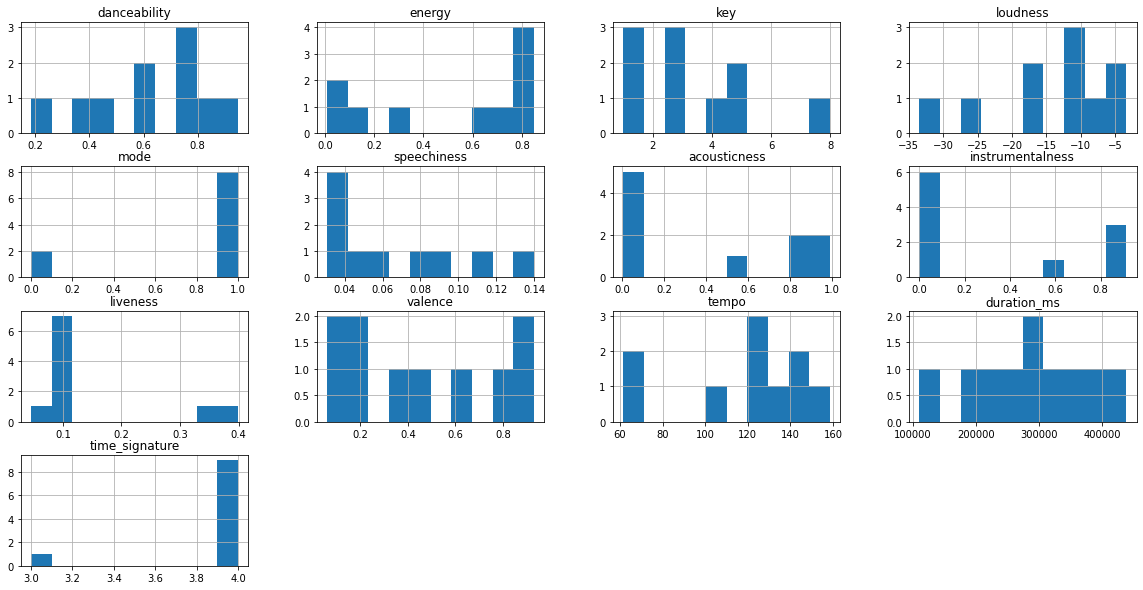

In [ ]:
#plotting data to spot outliers
songs_df.hist(figsize=(20,10));

###**Scaling**

In [ ]:
#we don't have outliers, so can use MinMaxScaler(this scaler is based on range, hence sensitive to outliers)
df_sk_pre = MinMaxScaler(feature_range=(1,100)).fit_transform(songs_df) #in the first pair of brackets we can pass the max and min value of the range we want to tranfsorm our data to(it is 0 and 1 by default)
pd.DataFrame(df_sk_pre, columns=songs_df.columns, index=songs_df.index) #Scikit-Learn returns data as a Numpy arrays, so we need to convert them back to a DataFrame

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,87.317647,100.000000,1.000000,100.000000,1.0,48.190302,50.543137,1.000222,20.766403,90.113636,60.605543,57.878046,100.0
The Real Slim Shady,100.000000,77.860516,57.571429,97.170020,1.0,25.002745,3.714610,1.000000,1.000000,80.568182,44.807834,53.491791,100.0
Águas De Março,60.270588,39.940762,29.285714,60.163347,100.0,100.000000,86.356727,1.000000,17.686652,50.000000,84.443687,31.881065,100.0
The Girl From Ipanema,60.141176,16.505882,100.000000,55.933167,100.0,8.517841,87.660864,1.180000,17.686652,38.295455,70.082132,63.661173,100.0
"Paint It, Black",37.235294,93.640787,1.000000,80.660159,100.0,57.066789,5.630687,1.264578,100.000000,63.750000,100.000000,28.831184,100.0
Sultans Of Swing,72.047059,93.523023,57.571429,78.175299,100.0,1.000000,6.844537,4.979518,80.681561,100.000000,89.287910,72.882452,100.0
Space Raiders - Charlotte de Witte Remix,74.117647,86.103941,43.428571,75.407769,100.0,71.015554,1.000000,95.012048,19.366516,1.000000,72.810827,100.000000,100.0
In Silence,72.435294,99.528947,1.000000,71.621315,100.0,7.340348,1.234745,98.698795,19.366516,16.704545,68.748850,86.461693,100.0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",1.000000,1.000000,29.285714,1.000000,100.0,20.202196,99.899682,65.626506,17.406674,18.181818,1.047872,1.000000,1.0


#Calculating distances between the variables

In [ ]:
#calculating the distances of the scaled data with doble for-loops
list_all_distances = []
for song in songs_df.index:
  dist_list = []
  for comp_song in songs_df.index:
    distance = sum(abs(songs_df.loc[comp_song,:] - songs_df.loc[song,:]))
    dist_list.append(distance)
  list_all_distances.append(dist_list)
s_df = pd.DataFrame(list_all_distances, index=songs_df.index)

In [ ]:
#calculating the distances of the non-scaled data with a sklearn method
s_df1 = pd.DataFrame(pairwise_distances(songs_df), index=songs_df.index)


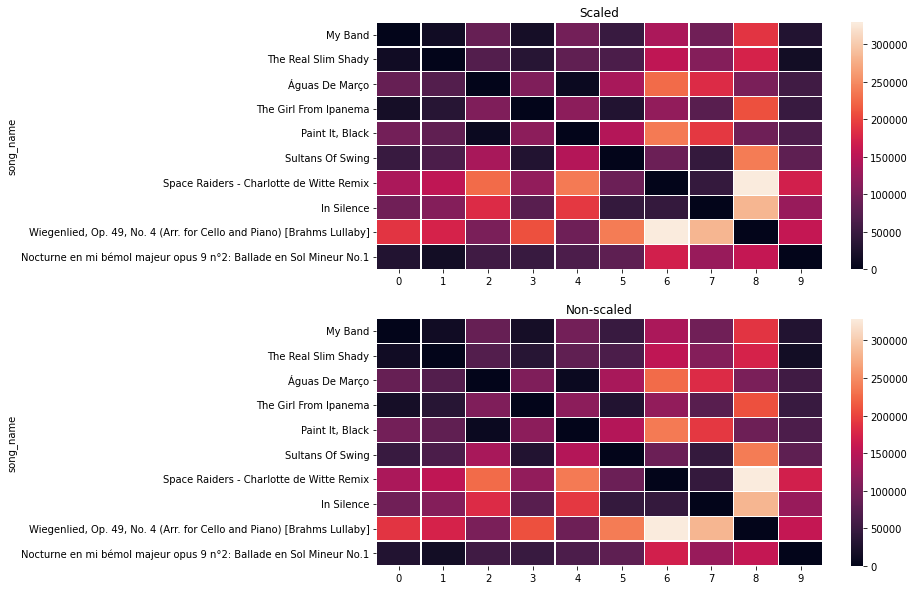

In [ ]:
#visualization of scaled and non-scaled distances
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) 

# Plotting the two plots
sns.heatmap(s_df, ax=ax1, linewidths=.2);
sns.heatmap(s_df1, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Scaled')
ax2.set_title('Non-scaled')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
score_list = []
for i in range(20,100):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(min_max_df)
    preds = kmeans_model.predict(min_max_df)
    score_list.append(kmeans_model.inertia_)

NameError: ignored